<a href="https://colab.research.google.com/github/PauloSergio0510/cdd_embraer_titanic/blob/master/titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Projeto Titanic Embraer
Etapas
1. Definição do Problema
2. Obtenção dos Dados
3. Exploração dos Dados
4. Preparação dos Dados
5. Modelagem
6. Avaliação
7. Relatório Científico
8. Apresentação

# Etapa 1 - Definição do Problema

A construção do Titanic levou cerca de 2 anos e custou 7,5 milhões de dólares (valores da época). Com 269 metros de comprimento, 28 metros de largura e 53 metros de altura, operava com uma tripulação de 892 pessoas e poderia levar até 2435 passageiros (espalhados pelas três classes disponíveis).

Pensado para ser o mais seguro e luxuoso navio da época, foi lançado ao mar em 1911, ganhando fama de ser “inafundável”.

O naufrágio do Titanic teve como fatores contribuintes causas naturais (como o clima) e causas humanas (negligência e excesso de confiança). Independente das causas, o fato é que seu naufrágio matou 1502 pessoas de um total de 2224 passageiros.

Embora aqueles que escaparam com vida tiveram sua boa dose de sorte, alguns grupos de pessoas eram mais propensos a escaparem da morte do que outros. Por exemplo, mulheres, crianças e passageiros da 1ª Classe. Assim, nota-se que existe algum padrão que pode ser extraído dos dados brutos.

# Etapa 2 - Obtenção dos Dados
## 2.1: Importando as bibliotecas necessárias

O comando import realiza a importação das biblioetecas, as bibliotecas contêm comandos uteis para o desenvolvimento do projeto.

* O pacote numpy possui funções de linear álgebra.
* O pacote Pandas possui funções de data processing, CSV file I/O.
* O pacote matplot possui funções para criação de gráficos e visualizações de dados.
* O pacote seaborn possui funções para análise de dados estatísticos.

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns  

## 2.2: Carregar arquivos CSV
* conjunto de treinamento (train.csv)
* conjunto de teste (test.csv)

In [0]:
dadostraincsv = pd.read_csv("train.csv")
dadostestcsv = pd.read_csv("test.csv")

# Etapa 3 - Exploração dos Dados

In [34]:
dadostraincsv.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Etapa 4 - Preparação dos Dados

4.1 Limpeza

In [35]:
def limpa(coluna,valor):
    dadostraincsv[coluna].fillna(valor,inplace=True)
    return dadostraincsv.head(6)
    
    
def remove(colunas):
    for i in range(0, len(colunas)):
        dadostraincsv.drop([colunas[i]],axis = 1, inplace = True)
    return dadostraincsv.head()

colunas = ['Pclass','Fare','Ticket','Cabin','PassengerId','SibSp']
remove(colunas)

,Survived,Name,Sex,Age,Parch,Embarked
0,0,"Braund, Mr. Owen Harris",male,22.0,0,S
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,0,C
2,1,"Heikkinen, Miss. Laina",female,26.0,0,S
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,0,S
4,0,"Allen, Mr. William Henry",male,35.0,0,S


In [0]:
dadostraincsv_idade = dadostraincsv.copy()
dadostraincsv_idade.drop(dadostraincsv[dadostraincsv['Age'].isnull() == True].index ,inplace=True)

##1

In [0]:
dadostraincsv['Not Survived'] = dadostraincsv['Survived'].map({0:1,1:0})

In [38]:
print('Sobreviventes     :', dadostraincsv['Survived'].value_counts()[1])
print('Não Sobreviventes :', dadostraincsv['Survived'].value_counts()[0])

Sobreviventes     : 342
Não Sobreviventes : 549


Text(0, 0.5, '')

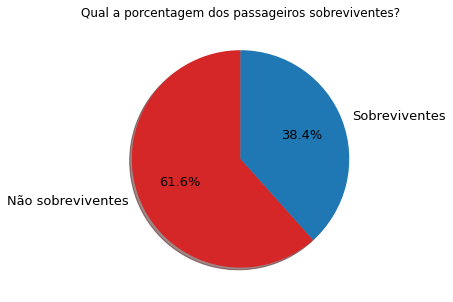

In [39]:
dadostraincsv['Survived'].value_counts().plot.pie(colors=('tab:red', 'tab:blue'), 
                                       title='Qual a porcentagem dos passageiros sobreviventes?', 
                                       fontsize=13, shadow=True, startangle=90,autopct='%1.1f%%',
                                       labels=('Não sobreviventes','Sobreviventes'),
                                       figsize=(5,5)).set_ylabel('')

##2

Text(0, 0.5, 'Frequência')

<Figure size 432x288 with 0 Axes>

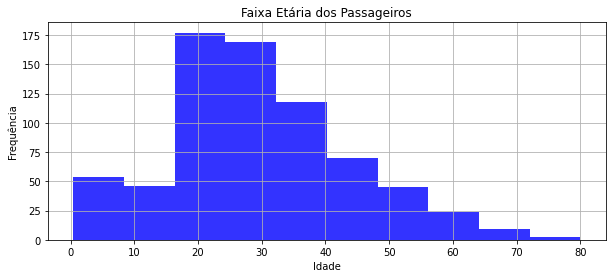

In [40]:
plt.figure();
dadostraincsv_idade.hist(column='Age', color=('blue'), alpha=0.8, bins=10, figsize=(10,4))
plt.title('Faixa Etária dos Passageiros')
plt.xlabel('Idade')
plt.ylabel('Frequência')

##3

(Text(0, 0.5, ''), Text(0.5, 0, ''))

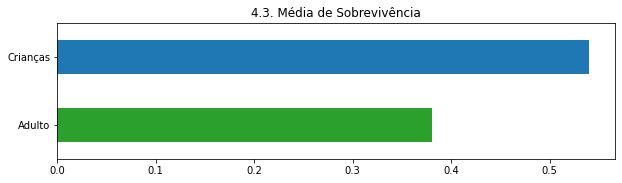

In [41]:
dadostraincsv_idade['Crianca_Adulto'] = 0
dadostraincsv_idade.loc[dadostraincsv_idade[dadostraincsv_idade['Age'] < 18].index, 'Crianca_Adulto'] = 'Crianças'
dadostraincsv_idade.loc[dadostraincsv_idade[dadostraincsv_idade['Age'] >= 18].index, 'Crianca_Adulto'] = 'Adulto'
dadostraincsv_idade.groupby('Crianca_Adulto')[['Survived']].mean()

dadostraincsv_idade.groupby('Crianca_Adulto')['Survived'].mean().plot.barh(title='4.3. Média de Sobrevivência', figsize=(10,2.5),
                                                                color=('tab:green','tab:blue')).set_ylabel(''),plt.xlabel('')

# Etapa 5 e 6 - Modelagem & Avaliação

# Etapa 7 - Relatório Científico

# Etapa 8 - Apresentação